# CREATING THE DUMMY BINARY CLASSIFIER

In [40]:
import numpy as np
from sklearn.base import BaseEstimator
from scipy.stats import bernoulli
from collections import Counter

In [41]:
class DummyBinaryClassifier(BaseEstimator):
    def __init__(self, p=0.5, method='uniform_random'):
        self.p = p
        self.method = method if method in ["uniform_random", "bernoulli", "normal"] else "uniform_random"
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        if self.method == "normal":
            return np.random.randn(len(X)) < self.p
        elif self.method == "bernoulli":
            return np.random.binomial(1, self.p, len(X)) < self.p
        else:
            return np.random.rand(len(X)) < self.p

# TASK 1

In [42]:
# let's create a dataset of size 100 instances.
X = np.random.rand(100)

__let's compute the label distribution for different configuration of the classifier__

In [43]:
dbc = DummyBinaryClassifier(p=0.3, method='normal')
y = dbc.predict(X)
c = Counter(y) 
{i[0]: i[1] / len(y) for i in c.items()}

{True: 0.56, False: 0.44}

__create reusable functions__

In [44]:
def compute_prior(y):
    # initialize the counter object on the 'y' labels
    c = Counter(y)
    # convert the labels into class proportions
    props = {i[0]:i[1]/len(y) for i in c.items()}
    if True not in props:
        props[True] = 0.0
    if False not in props:
        props[False] = 0.0
    return props

__extract the probability of True predictions for the dataset using different random generators__

In [45]:
p_vals = np.arange(0., 1., 0.1)
b_vals = []
g_vals = []
u_vals = []
for p in p_vals:
    # spawn the dummy binary classifier with bernouli random sample generator
    cla = DummyBinaryClassifier(p=p, method='bernoulli')
    # predict the labels for the input
    y = cla.predict(X)
    # compute priors
    props = compute_prior(y)
    # pick the probabilty of True class
    b_vals.append(props[True])
    
    # spawn the dummy binary classifier with gaussian random sample generator
    y = DummyBinaryClassifier(p=p, method='normal').predict(X)
    g_vals.append(compute_prior(y)[True])
    
    # spawn the dummy binary classifier with uniform random sample generator
    y = DummyBinaryClassifier(p=p, method='uniform_random').predict(X)
    u_vals.append(compute_prior(y)[True])

__plot the trends side on the same plot for comparison__

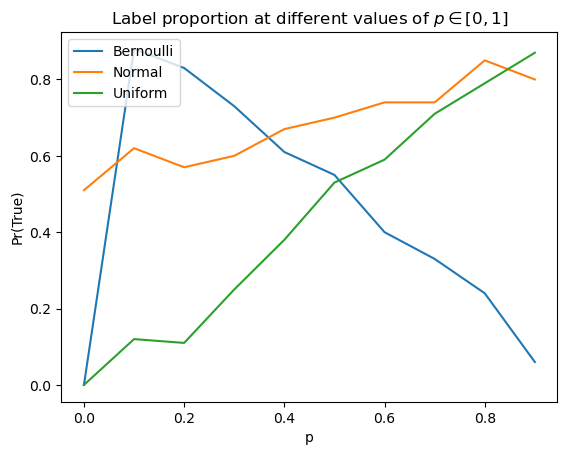

In [46]:
import matplotlib.pyplot as plt
plt.plot(p_vals, b_vals)
plt.plot(p_vals, g_vals)
plt.plot(p_vals, u_vals)
plt.xlabel('p')
plt.ylabel('Pr(True)')
plt.title('Label proportion at different values of $p\in[0,1]$')
plt.legend(['Bernoulli','Normal','Uniform'], loc='upper left')
plt.show()

__if the number of samples is increased, the plots tend to understandably become a straight line__

# TASK 2

## PART 1

In [47]:
from sklearn.datasets import load_iris
iris = load_iris()

# Get the features (X) and target labels (y) from the dataset
X = iris.data
y = iris.target

# We label Versicolor (class 1) as 1 (True) and other classes (Setosa and Virginica) as 0 (False)
y_binary = (y == 1).astype(int)
# Count the occurrences of 0s and 1s
counts = np.bincount(y_binary)
# 1. Reporting the label prior of binary IRIS DATASET
print(f"Number of '0' labels (Not Versicolor): {counts[0]}")
print(f"Number of '1' labels (Versicolor): {counts[1]}")

Number of '0' labels (Not Versicolor): 100
Number of '1' labels (Versicolor): 50


## PART 2

/home/lonewolf/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/lonewolf/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


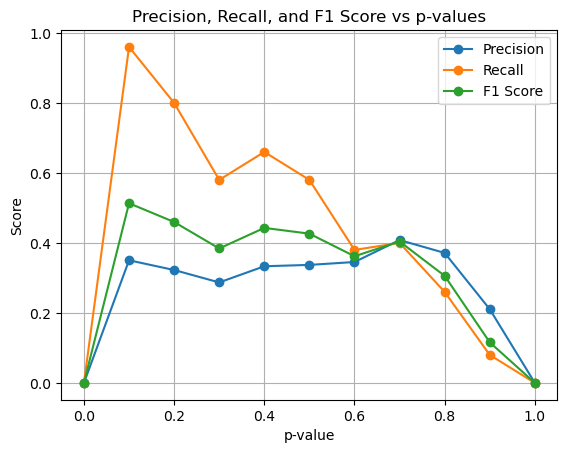

In [48]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, f1_score, precision_score, recall_score
p_values = np.arange(0, 1.1, 0.1)

# Creating array to store values for multiple p-value
precision_ = []
recall_ = []
f1_score_ = []
tpr_ = []
fpr_ = []
auprc_ = []
auroc_ = []

for p in p_values:
    # Instantiate and fit the DummyBinaryClassifier
    model = DummyBinaryClassifier(p=p, method='bernoulli')
    y_pred = model.predict(X)
    
    # Calculating the metrics
    # 1. Precision
    precision = precision_score(y_binary, y_pred)
    precision_.append(precision)
    # 2. Recall
    recall = recall_score(y_binary, y_pred)
    recall_.append(recall)
    # 3. F1 Score
    f1 = f1_score(y_binary, y_pred)
    f1_score_.append(f1)

    fpr, tpr, _ = roc_curve(y_binary, y_pred)
    fpr_.append(fpr)
    tpr_.append(tpr)


# 2. Plot Precision, Recall, F1 as line plots
plt.plot(p_values, precision_, label='Precision', marker='o')
plt.plot(p_values, recall_, label='Recall', marker='o')
plt.plot(p_values, f1_score_, label='F1 Score', marker='o')
plt.xlabel('p-value')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs p-values')
plt.legend()
plt.grid(True)
plt.show()

## PART 3

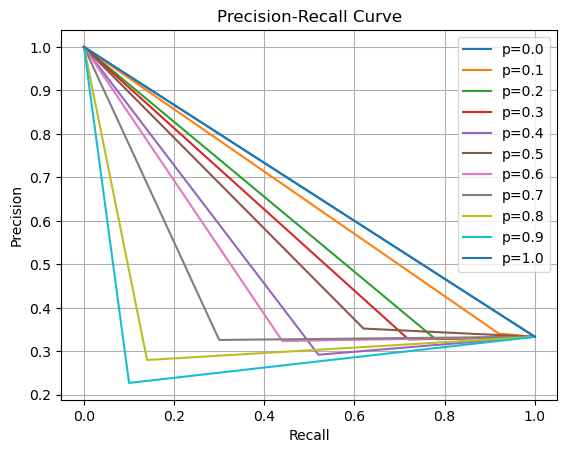

In [49]:
# 3. Plot Precision-Recall Curve (PRC)
# Use the precision_recall_curve function
# Here I have plotted for p=0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0
all_precisions = []
all_recalls = []

for p in p_values:
    model = DummyBinaryClassifier(p=p, method='bernoulli')
    y_pred = model.predict(X)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred)
    all_precisions.append(precision)
    all_recalls.append(recall)

# Plotting PRC
for i, p in enumerate(p_values):
    plt.plot(all_recalls[i], all_precisions[i], label=f'p={p:.1f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

## PART 4

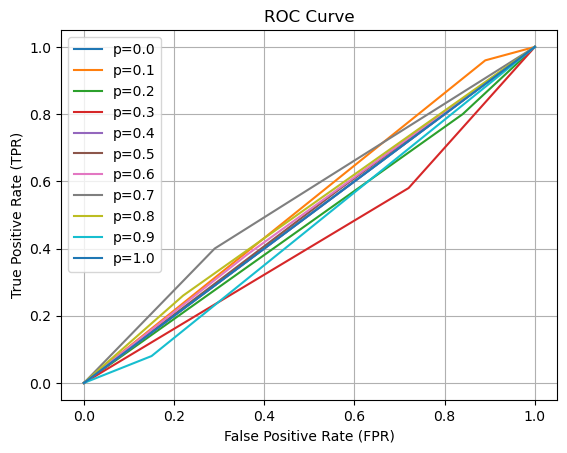

In [50]:
# 4. Plot ROC Curve
# Here I have plotted for p=0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0
for i, p in enumerate(p_values):
    plt.plot(fpr_[i], tpr_[i], label=f'p={p:.1f}')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

## PART 5

In [51]:
# 5. Calculate AUPRC and AUROC
# I have used the auc function
auprcs= []
for i in range(len(p_values)):
    auprc = auc(all_recalls[i], all_precisions[i])
    auprcs.append(auprc)
print("AUPRC for different p-values:",auprcs)

aurocs = []
for i in range(len(p_values)):
    auroc = auc(fpr_[i], tpr_[i])
    aurocs.append(auroc)
print("AUROC for different p-values:",aurocs)

AUPRC for different p-values: [0.6666666666666666, 0.6437037037037038, 0.590532212885154, 0.5703030303030303, 0.48606741573033707, 0.5494696969696969, 0.4750980392156863, 0.42971014492753623, 0.35333333333333333, 0.3136363636363636, 0.6666666666666666]
AUROC for different p-values: [0.5, 0.5349999999999999, 0.4800000000000001, 0.43000000000000005, 0.5, 0.505, 0.51, 0.5549999999999999, 0.52, 0.465, 0.5]


# TASK 3

Here, I have taken only two x features for easy visualisation. An alternate way is to use other features or use PCA to find the better features. Feature pairs can also be taken but this leads to a lot of plots

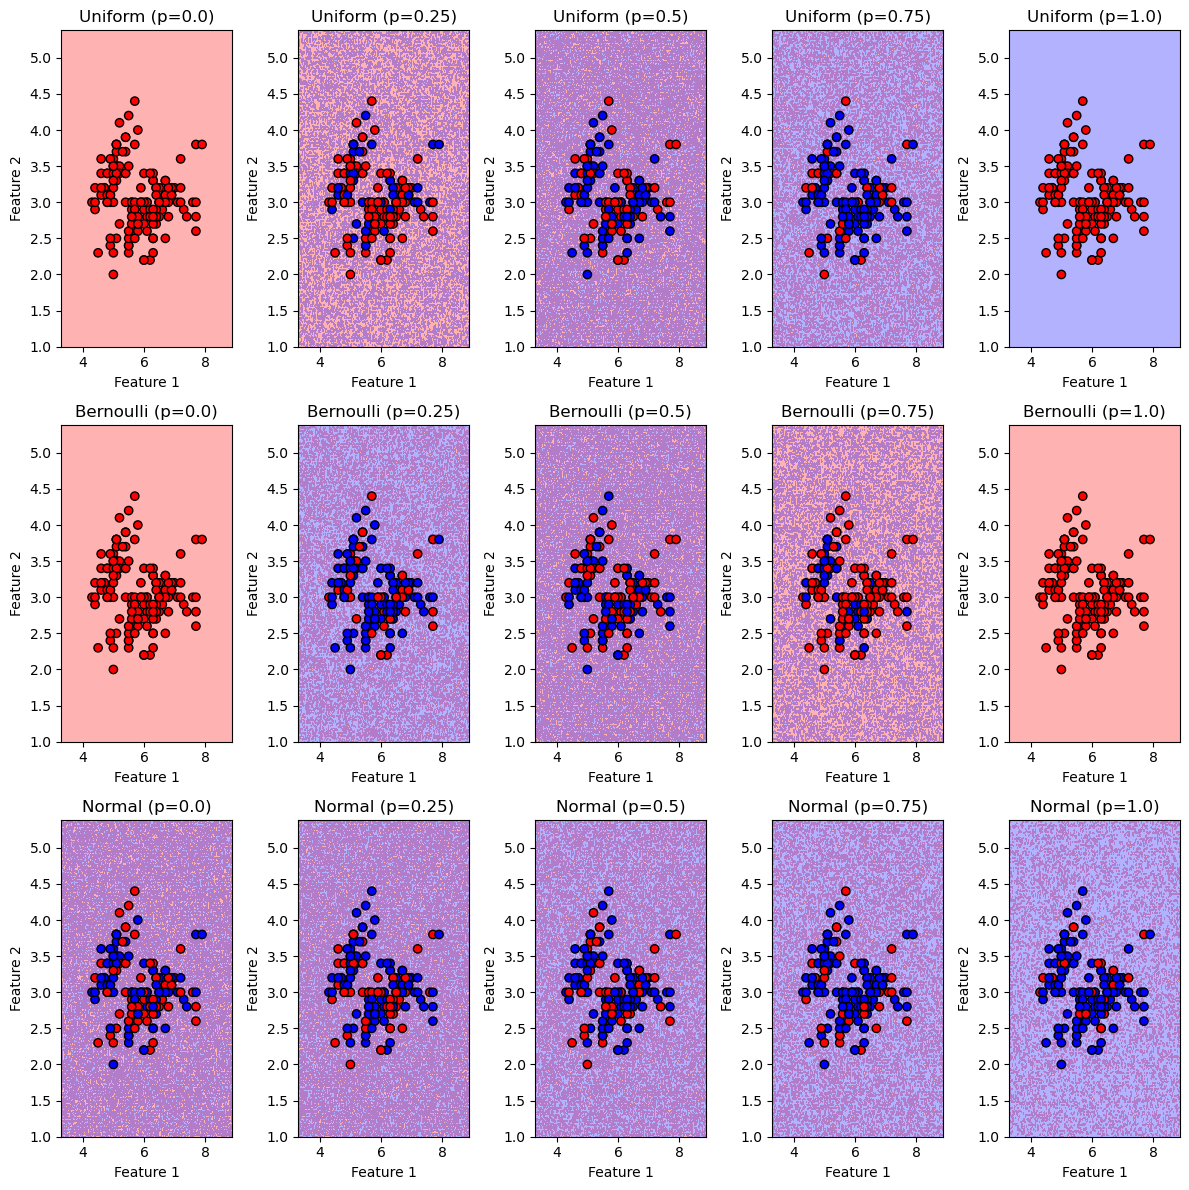

In [52]:
from matplotlib.colors import ListedColormap

X = X[:, [0, 1]]  # Use only the first two features

# Function to plot decision boundaries
def plot_decision_boundary(clf, X, y, p, method):
    # Define grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    # Predict on the mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FF0000', '#0000FF']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
    plt.title(f'{method.capitalize()} (p={p})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Values of p to evaluate
p_values = np.arange(0, 1.1, 0.25)
methods = ['uniform', 'bernoulli', 'normal']

# Set up the plot
plt.figure(figsize=(12, 12))

# Loop over all methods and p values to generate decision boundary plots
for i, method in enumerate(methods):
    for j, p in enumerate(p_values):
        plt.subplot(len(methods), len(p_values), i * len(p_values) + j + 1)
        clf = DummyBinaryClassifier(p=p, method=method)
        clf.fit(X, y)
        y_pred = clf.predict(X)
        plot_decision_boundary(clf, X, y_pred, p, method)

plt.tight_layout()
plt.show()